<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
plt.style.use("fivethirtyeight")
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [120]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [121]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [122]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [123]:
# Answer:
movies[["duration"]].mean()

duration    120.979571
dtype: float64

In [124]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [125]:
# Answer:
print("Shortest duration: ",movies.duration.min())
print("Longest duration: ",movies.duration.max())

Shortest duration:  64
Longest duration:  242


#### Create a histogram of duration, choosing an "appropriate" number of bins.

In [126]:
movies[["duration"]].shape

(979, 1)

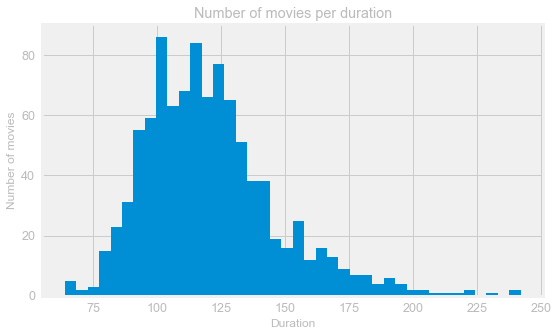

In [127]:
# Answer:
movies.duration.hist(bins=40, figsize=(8,5))
plt.xlabel('Duration');
plt.ylabel('Number of movies');
plt.title('Number of movies per duration');

#### Use a box plot to display that same data.

<AxesSubplot:>

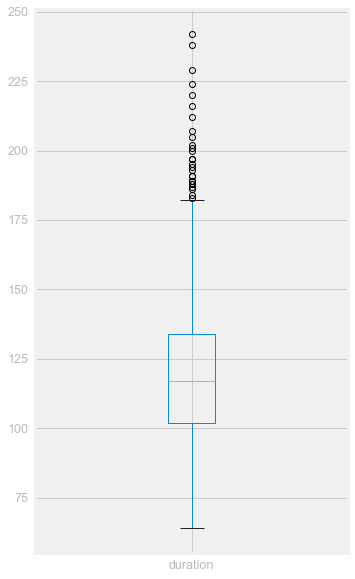

In [128]:
# Answer:
movies.boxplot(column='duration',figsize=(5,10))

## Intermediate level

In [129]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Count how many movies have each of the content ratings.

In [130]:
# Answer:
movies[['content_rating']].value_counts()

content_rating
R                 460
PG-13             189
PG                123
NOT RATED          65
APPROVED           47
UNRATED            38
G                  32
NC-17               7
PASSED              7
X                   4
GP                  3
TV-MA               1
dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

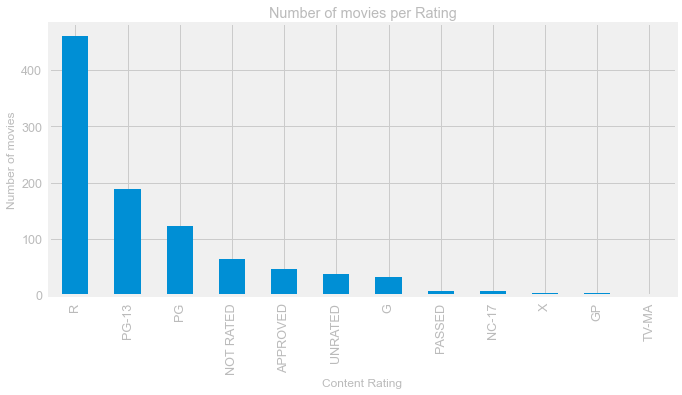

In [131]:
# Answer:
movies.content_rating.value_counts().plot(kind='bar', figsize=(10,5));
plt.xlabel('Content Rating');
plt.ylabel('Number of movies');
plt.title('Number of movies per Rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [132]:
# Answer:
movies.replace({"NOT RATED":"UNRATED",
               "APPROVED":"UNRATED",
               "PASSED":"UNRATED",
               "GP":"UNRATED"}, inplace=True)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [133]:
# Answer:
movies.replace({"X":"NC-17",
               "TV-MA":"NC-17",}, inplace=True)

#### Count the number of missing values in each column.

In [134]:
# Answer:
movies.isnull().sum()


star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [135]:
# Answer:
movies.content_rating.fillna(value="UNRATED", inplace=True)

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [148]:
# Answer:
#group by
long_movies    = movies[movies.duration > 120].groupby([movies.star_rating]).mean()
short_movies   = movies[movies['duration'] < 120].groupby([movies.star_rating]).mean()
print(long_movies)
print(short_movies)

             star_rating    duration
star_rating                         
7.4                  7.4  142.333333
7.5                  7.5  135.690476
7.6                  7.6  137.403846
7.7                  7.7  141.297872
7.8                  7.8  138.280000
7.9                  7.9  145.555556
8.0                  8.0  146.642857
8.1                  8.1  141.659574
8.2                  8.2  146.703704
8.3                  8.3  148.857143
8.4                  8.4  151.523810
8.5                  8.5  152.866667
8.6                  8.6  156.333333
8.7                  8.7  144.333333
8.8                  8.8  154.200000
8.9                  8.9  170.000000
9.0                  9.0  152.000000
9.1                  9.1  200.000000
9.2                  9.2  175.000000
9.3                  9.3  142.000000
             star_rating    duration
star_rating                         
7.4                  7.4  103.750000
7.5                  7.5  103.015873
7.6                  7.6  102.328571
7

#### Use a visualization to detect whether there is a relationship between duration and star rating.

In [ ]:
# Answer:
# correlation heatmap


#### Calculate the average duration for each genre.

In [ ]:
# Answer:

## Advanced level

#### Visualize the relationship between content rating and duration.

In [ ]:
# Answer:

#### Determine the top rated movie (by star rating) for each genre.

In [ ]:
# Answer:

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [ ]:
# Answer:

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!